# Analysis of the final catalogue of matched sources

We will analyse the changes in the classification using the new sigma and the new catalogue without the galaxies that went to LGZ

## Configuration

### Load libraries and setup

In [1]:
import numpy as np
from astropy.table import Table, join
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky
from IPython.display import clear_output
import pickle
import os

In [2]:
from mltier1 import (get_center, Field, parallel_process, describe)

In [3]:
%load_ext autoreload

In [4]:
%autoreload

In [5]:
from IPython.display import clear_output

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
def most_common(a, n=2):
    u, c = np.unique(a, return_counts=True)
    order = np.argsort(c)
    for i in range(n):
        print(c[order][-(i+1)], u[order][-(i+1)])

### General configuration

In [8]:
save_intermediate = True
plot_intermediate = True

In [9]:
idp = "idata/final_analysis_pdf_v0.8"

In [10]:
if not os.path.isdir(idp):
    os.makedirs(idp)

## Load data

In [11]:
pwli = Table.read("lofar_pw_pdf.fits")

In [12]:
pwli.colnames

['Source_Name',
 'RA',
 'E_RA',
 'DEC',
 'E_DEC',
 'Peak_flux',
 'E_Peak_flux',
 'Total_flux',
 'E_Total_flux',
 'Maj',
 'E_Maj',
 'Min',
 'E_Min',
 'PA',
 'E_PA',
 'Isl_rms',
 'S_Code',
 'Mosaic_ID',
 'AllWISE',
 'objID',
 'ra',
 'dec',
 'raErr',
 'decErr',
 'W1mag',
 'W1magErr',
 'i',
 'iErr',
 'colour',
 'category',
 'lr',
 'lr_dist']

In [13]:
lofar_all = Table.read("data/LOFAR_HBA_T1_DR1_merge_ID_optical_v0.8.fits")

#### Join data tables

In [14]:
pwl = join(pwli, lofar_all[['Source_Name', 'AllWISE', 'objID', 'ML_LR', 
                            'ID_flag', 'ID_name', 'ID_ra', 'ID_dec', 
                            'LGZ_Size', 'LGZ_Width', 'LGZ_PA', 'LGZ_Assoc', 
                            'LGZ_Assoc_Qual', 'LGZ_ID_Qual']], 
           join_type='left', 
           keys='Source_Name', 
           uniq_col_name='{col_name}{table_name}', 
           table_names=['', '_input'])

In [15]:
colour_limits = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.5, 4.0]

In [16]:
bin_list, centers, Q_0_colour, n_m, q_m = pickle.load(open("lofar_params.pckl", "rb"))

In [17]:
def smooth(a):
    g=np.gradient(a)
    return np.nanmean(g.reshape(len(g)//10, 10), axis=1)

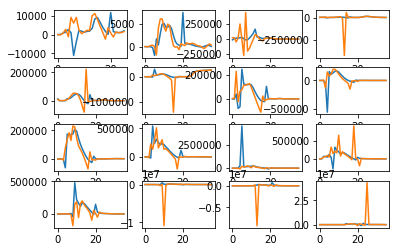

In [18]:
for i in range(16):
    subplot(4,4,i+1)
    plot(smooth(q_m[i])/smooth(n_m[i]))
    plot(smooth(np.gradient(q_m[i]))/smooth(np.gradient(n_m[i])))

In [19]:
from astropy.stats import bayesian_blocks

In [20]:
bayesian_blocks(np.gradient(q_m[10]))

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/astropy/stats/bayesian_blocks.py:435: RuntimeWarning: divide by zero encountered in log
  return N_k * (np.log(N_k) - np.log(T_k))


array([ -8.43984245e-04,  -2.03550417e-05,  -9.81361631e-07,
        -3.72202907e-08,  -1.42326983e-09,  -5.01997107e-11,
        -1.11235385e-12,  -2.92156497e-14,  -5.41712794e-16,
        -7.07648183e-18,  -1.45595204e-19,  -6.50199737e-20,
         8.75703426e-04])

#### Explore and repair data

In [21]:
for col in pwl.colnames:
    fv = pwl[col].fill_value
    typ = pwl[col].dtype
    print(col, fv, typ)
    # Restore NaNs
    if fv == 1e+20:
        pwl[col][(pwl[col] == fv)] = np.nan
#     if (isinstance(fv, np.float64) and (fv != 1e+20)):
#         print(col, fv)
#         pwl[col].fill_value = 1e+20

Source_Name N/A <U88
RA 1e+20 >f8
E_RA 1e+20 >f8
DEC 1e+20 >f8
E_DEC 1e+20 >f8
Peak_flux 1e+20 >f8
E_Peak_flux 1e+20 >f8
Total_flux 1e+20 >f8
E_Total_flux 1e+20 >f8
Maj 1e+20 >f8
E_Maj 1e+20 >f8
Min 1e+20 >f8
E_Min 1e+20 >f8
PA 1e+20 >f8
E_PA 1e+20 >f8
Isl_rms 1e+20 >f8
S_Code N/A <U1
Mosaic_ID N/A <U11
AllWISE N/A <U19
objID 999999 >i8
ra 1e+20 >f8
dec 1e+20 >f8
raErr 1e+20 >f8
decErr 1e+20 >f8
W1mag 1e+20 >f8
W1magErr 1e+20 >f8
i 1e+20 >f8
iErr 1e+20 >f8
colour 1e+20 >f8
category 1e+20 >f8
lr 1e+20 >f8
lr_dist 1e+20 >f8
AllWISE_input N/A <U19
objID_input 999999 >i8
ML_LR 1e+20 >f8
ID_flag 999999 >i8
ID_name N/A <U27
ID_ra 1e+20 >f8
ID_dec 1e+20 >f8
LGZ_Size 1e+20 >f8
LGZ_Width 1e+20 >f8
LGZ_PA 1e+20 >f8
LGZ_Assoc 1e+20 >f8
LGZ_Assoc_Qual 1e+20 >f8
LGZ_ID_Qual 1e+20 >f8


In [22]:
pwl["colour"][(pwl["colour"] == 1e+20)] = np.nan

In [23]:
describe(pwl["colour"])

2.128 +/- 0.814; median: 2.068; limits: [-1.640, 9.281]; N=318771 (172386 NaN; 0 masked)


/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:4125: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  part.partition(kth)


Change the AllWISE_input that are '' to 'N/A'. That comes from a previous error with the fill value.

In [24]:
pwl["AllWISE_input"][pwl["AllWISE_input"] == ""] = "N/A"

### Create the additional columns for the types of matches

In [25]:
threshold_sel = 0.358

In [26]:
cond_mlr = (pwl['ID_flag'] == 1) & (pwl['Maj'] < 30.)

/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


In [27]:
pwlaux = pwl[cond_mlr].filled()

Matched sources

In [28]:
pwlaux_match = pwlaux[~np.isnan(pwlaux['ML_LR'])]

In [29]:
len(pwlaux_match)

218600

In [30]:
cond_match = (
    ~np.isnan(pwlaux_match['lr']) &
    (pwlaux_match['lr'] >= threshold_sel) &
    (
        (pwlaux_match["AllWISE_input"] != "N/A") |
         ~np.isnan(pwlaux_match['objID_input'])
    ) &
    (
        ( 
            (pwlaux_match["AllWISE"] == pwlaux_match["AllWISE_input"]) &
            (pwlaux_match["objID"] == pwlaux_match["objID_input"]) &
            ~np.isnan(pwlaux_match["objID"]) &
            (pwlaux_match["AllWISE"] != "N/A")
        ) |
        ( 
            (pwlaux_match["AllWISE"] == pwlaux_match["AllWISE_input"]) &
            np.isnan(pwlaux_match["objID"])
        ) |
        ( 
            (pwlaux_match["AllWISE"] == "N/A") &
            (pwlaux_match["objID"] == pwlaux_match["objID_input"])
        )
    )
        
)
m_m = np.sum(cond_match)
print(m_m)

217070


In [31]:
cond_diffmatch = (
    ~np.isnan(pwlaux_match['lr']) &
    (pwlaux_match['lr'] >= threshold_sel) &
    (
        (pwlaux_match["AllWISE_input"] != "N/A") |
         ~np.isnan(pwlaux_match['objID_input'])
    ) &
    (
        ( 
            (pwlaux_match["AllWISE"] != pwlaux_match["AllWISE_input"]) |
            (pwlaux_match["objID"] != pwlaux_match["objID_input"])
        ) 
    )

)
m_dm = np.sum(cond_diffmatch)
print(m_dm)

512


In [32]:
cond_nomatch = (
    np.isnan(pwlaux_match['lr']) |
    (pwlaux_match['lr'] < threshold_sel)
)
m_nm = np.sum(cond_nomatch)
print(m_nm)

1021


In [33]:
m_nm + m_dm + m_m

218603

Non-matched sources

In [34]:
pwlaux_nomatch = pwlaux[np.isnan(pwlaux['ML_LR'])]

In [35]:
len(pwlaux_nomatch)

81522

In [36]:
cond2_match = (
    ~np.isnan(pwlaux_nomatch['lr']) &
    (pwlaux_nomatch['lr'] >= threshold_sel)   
)
m2_m = np.sum(cond2_match)
print(m2_m)

4316


/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, oper)(other)


In [37]:
cond2_nomatch = (
    np.isnan(pwlaux_nomatch['lr']) |
    (pwlaux_nomatch['lr'] < threshold_sel)
)
m2_nm = np.sum(cond2_nomatch)
print(m2_nm)

77206


/disk2/jsm/prog/anaconda/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


In [38]:
m2_nm + m2_m

81522

In [39]:
m2_nm + m2_m + m_nm + m_dm + m_m

300125

Diagnostic columns

In [40]:
pwl['match_code'] = 0

In [41]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_diffmatch]["Source_Name"])] = 2

In [42]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_match]["Source_Name"])]=1

In [43]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_nomatch]["Source_Name"])] = 3

In [44]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & np.isnan(pwl['ML_LR'])][cond2_match]["Source_Name"])] = 4

In [45]:
pwl['match_code'][np.isin(pwl["Source_Name"], pwl[cond_mlr & np.isnan(pwl['ML_LR'])][cond2_nomatch]["Source_Name"])] = 5

In [46]:
for i in range(6):
    print(i, np.sum(pwl['match_code'] == i))

0 18649
1 217070
2 509
3 1021
4 4316
5 77206


### Study the 3 repeated sources

3 sources that are in group 1 and 2

In [47]:
pwl['match_code2'] = 0
pwl['match_code2'][np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_match]["Source_Name"])]=1

In [48]:
t = pwl[np.isin(pwl["Source_Name"], pwl[cond_mlr & ~np.isnan(pwl['ML_LR'])][cond_diffmatch]["Source_Name"])]
t[t['match_code2'] != 0][['Source_Name', "AllWISE", "AllWISE_input", "objID", "objID_input"]]

Source_Name,AllWISE,AllWISE_input,objID,objID_input
str88,str19,str19,int64,int64
ILTJ105150.16+472306.9,N/A,J105150.11+472306.4,164861629587942860,164861629587942860
ILTJ124446.75+545233.0,N/A,J124446.79+545232.8,173851911952891597,173851911952891597
ILTJ131700.45+490748.4,N/A,J131700.38+490748.1,166951992516796699,166951992516796699


In [49]:
pwl[pwl["objID"] == 164861629587942860]

Source_Name,RA,E_RA,DEC,E_DEC,Peak_flux,E_Peak_flux,Total_flux,E_Total_flux,Maj,E_Maj,Min,E_Min,PA,E_PA,Isl_rms,S_Code,Mosaic_ID,AllWISE,objID,ra,dec,raErr,decErr,W1mag,W1magErr,i,iErr,colour,category,lr,lr_dist,AllWISE_input,objID_input,ML_LR,ID_flag,ID_name,ID_ra,ID_dec,LGZ_Size,LGZ_Width,LGZ_PA,LGZ_Assoc,LGZ_Assoc_Qual,LGZ_ID_Qual,match_code,match_code2
str88,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str11,str19,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64,float64,int64,str27,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
ILTJ105150.16+472306.9,162.958997743,0.144574540402,47.3852535063,0.135700150377,1.0400645428,0.0620059670136,0.88200388277,0.113680644158,5.65331936162,0.345452470339,5.40066860218,0.314129798109,113.261924388,53.196333999,0.0649695139145,S,P3Hetdex16,N/A,164861629587942860,162.95880637,47.38512028,0.0451599992812,0.0261400006711,nan,nan,18.5082593446,0.0200500003994,nan,1.0,67.0586944523,0.669040319887,J105150.11+472306.4,164861629587942860,7.67859626092,1,PSO J105150.107+472306.380,162.95880637,47.38512028,nan,nan,nan,nan,nan,nan,1,1


## Analyse changes in the matches

In [50]:
most_common(pwl["AllWISE_input"].filled(), n=10)

102267 N/A
4 J132633.11+484745.9
2 J132959.54+471558.1
2 J140250.06+491021.4
2 J113321.11+470145.2
2 J113234.86+530404.6
2 J114607.72+472940.5
2 J120601.09+472843.3
2 J150913.19+523142.4
2 J120534.28+503221.7


Save data for tests

In [51]:
np.sum(~np.isnan(pwl["colour"]) & (pwl["match_code"] == 3))

0

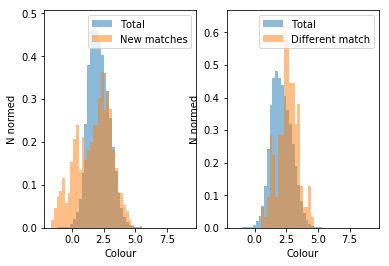

In [52]:
subplot(1,2,1)
val, bins, _ = hist(pwl["colour"][~np.isnan(pwl["colour"]) & (pwl["match_code"] != 0)], 
                    bins=50, normed=True, alpha=0.5, label="Total")
val, bins, _ = hist(pwl["colour"][~np.isnan(pwl["colour"]) & (pwl["match_code"] == 4)], 
                    bins=bins, normed=True, alpha=0.5, label="New matches")
xlabel("Colour")
ylabel("N normed")
legend()
subplot(1,2,2)
val, bins, _ = hist(pwl["colour"][~np.isnan(pwl["colour"]) & (pwl["match_code"] != 0)], 
                    bins=bins, normed=True, alpha=0.5, label="Total")
val, bins, _ = hist(pwl["colour"][~np.isnan(pwl["colour"]) & (pwl["match_code"] == 2)], 
                    bins=bins, normed=True, alpha=0.5, label="Different match")
xlabel("Colour")
ylabel("N normed")
legend()

## Additional description of the data

In [69]:
describe(pwlaux['ML_LR'])

513.417 +/- 678.597; median: 249.663; limits: [1.291, 5209.663]; N=300623 (81490 NaN; 0 masked)


In [70]:
describe(pwlaux['lr'])

559.391 +/- 1009.254; median: 137.720; limits: [0.000, 10404.787]; N=300623 (12224 NaN; 0 masked)


In [71]:
len(pwlaux)

300623

In [72]:
np.sum(
    (pwlaux["AllWISE"] != pwlaux["AllWISE_input"]) |
    (pwlaux["objID"] != pwlaux["objID_input"])  
      )

6019

In [73]:
np.sum(
    (pwlaux["AllWISE"] != pwlaux["AllWISE_input"]) &
    (pwlaux["objID"] != pwlaux["objID_input"])  
      )

2551

In [74]:
np.sum(
    (pwl[cond_mlr].filled()["AllWISE"] != pwl[cond_mlr]["AllWISE_input"]) &
    (pwl[cond_mlr].filled()["objID"] == pwl[cond_mlr]["objID_input"])  
      )

96

In [75]:
np.sum(
    (pwl[cond_mlr].filled()["AllWISE"] == pwl[cond_mlr]["AllWISE_input"]) &
    (pwl[cond_mlr].filled()["objID"] != pwl[cond_mlr]["objID_input"])  
      )

212

In [76]:
for i in ["AllWISE", "AllWISE_input", "objID", "objID_input"]:
    print(i)
    most_common(pwl[cond_mlr][i].filled(), n=3)

AllWISE
90589 N/A
2 J114351.84+534758.6
2 J121406.39+462302.4
AllWISE_input
92739 N/A
1 J121404.24+554324.9
1 J121404.58+541509.0
objID
144664 999999
2 163352016837856893
2 163971633340322080
objID_input
146362 999999
1 167041976433181499
1 167041974666874572


In [77]:
Q_0_colour

array([ 0.21493265,  0.04089325,  0.001     ,  0.00569206,  0.02510625,
        0.03587855,  0.0513815 ,  0.05742317,  0.05541292,  0.05003769,
        0.04789634,  0.04209503,  0.03628279,  0.04824595,  0.01839814,
        0.00593242])

In [78]:
np.sum(Q_0_colour)

0.73660870087729835